In [1]:
import sqlite3
import pandas as pd

# Lyrics

In [2]:
connection = sqlite3.connect("../data/raw/mxm_dataset.db")

query = """
    SELECT *
    FROM lyrics
"""

lyrics = pd.read_sql(query, connection)
      
connection.close()

lyrics

,track_id,mxm_tid,word,count,is_test
0,TRAAAAV128F421A322,4623710,i,6,0
1,TRAAAAV128F421A322,4623710,the,4,0
2,TRAAAAV128F421A322,4623710,you,2,0
3,TRAAAAV128F421A322,4623710,to,2,0
4,TRAAAAV128F421A322,4623710,and,5,0
...,...,...,...,...,...
19045327,TRZZZZD128F4236844,2466899,easili,1,1
19045328,TRZZZZD128F4236844,2466899,disast,1,1
19045329,TRZZZZD128F4236844,2466899,frown,1,1
19045330,TRZZZZD128F4236844,2466899,teas,1,1


In [3]:
lyrics = (
    lyrics
    .pivot(columns="word", index="track_id", values="count")
    .fillna(0).astype(int)
)

lyrics 

word,&,000,1,10,100,12,13,15,16,2,...,è,é,él,és,était,être,ô,über,–,‘caus
track_id,,,,,,,,,,,,,,,,,,,,,
TRAAAAV128F421A322,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TRAAABD128F429CF47,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TRAAAED128E0783FAB,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TRAAAEF128F4273421,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TRAAAEW128F42930C0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TRZZZXA128F428ED56,0,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TRZZZXV128F4289747,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TRZZZYV128F92E996D,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Metadata

In [4]:
connection = sqlite3.connect("../data/raw/track_metadata.db")

query = """
    SELECT *
    FROM songs
"""

songs = pd.read_sql(query, connection)

connection.close()

songs

,track_id,title,song_id,release,artist_id,artist_mbid,artist_name,duration,artist_familiarity,artist_hotttnesss,year
0,TRMMMYQ128F932D901,Silent Night,SOQMMHC12AB0180CB8,Monster Ballads X-Mas,ARYZTJS1187B98C555,357ff05d-848a-44cf-b608-cb34b5701ae5,Faster Pussy cat,252.05506,0.649822,0.394032,2003
1,TRMMMKD128F425225D,Tanssi vaan,SOVFVAK12A8C1350D9,Karkuteillä,ARMVN3U1187FB3A1EB,8d7ef530-a6fd-4f8f-b2e2-74aec765e0f9,Karkkiautomaatti,156.55138,0.439604,0.356992,1995
2,TRMMMRX128F93187D9,No One Could Ever,SOGTUKN12AB017F4F1,Butter,ARGEKB01187FB50750,3d403d44-36ce-465c-ad43-ae877e65adc4,Hudson Mohawke,138.97098,0.643681,0.437504,2006
3,TRMMMCH128F425532C,Si Vos Querés,SOBNYVR12A8C13558C,De Culo,ARNWYLR1187B9B2F9C,12be7648-7094-495f-90e6-df4189d68615,Yerba Brava,145.05751,0.448501,0.372349,2003
4,TRMMMWA128F426B589,Tangle Of Aspens,SOHSBXH12A8C13B0DF,Rene Ablaze Presents Winter Sessions,AREQDTE1269FB37231,,Der Mystic,514.29832,0.000000,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...
999995,TRYYYUS12903CD2DF0,O Samba Da Vida,SOTXAME12AB018F136,Pacha V.I.P.,AR7Z4J81187FB3FC59,9d50cb20-7e42-45cc-b0dd-154c3e92a577,Kiko Navarro,217.44281,0.528617,0.411595,0
999996,TRYYYJO128F426DA37,Jago Chhadeo,SOXQYIQ12A8C137FBB,Naale Baba Lassi Pee Gya,ART5FZD1187B9A7FCF,2357c400-9109-42b6-b3fe-9e2d9f8e3872,Kuldeep Manak,244.16608,0.401500,0.374866,0
999997,TRYYYMG128F4260ECA,Novemba,SOHODZI12A8C137BB3,Dub_Connected: electronic music,ARZ3R6M1187B9AF750,8b97e9c8-61f5-4615-9a96-276f24204e34,Gabriel Le Mar,553.03791,0.556918,0.336914,0
999998,TRYYYDJ128F9310A21,Faraday,SOLXGOR12A81C21EB7,The Trance Collection Vol. 2,ARCMCOK1187B9B1073,4ac5f3de-c5ad-475e-ad50-41f1ef9dba20,Elude,484.51873,0.403668,0.256935,0


In [5]:
songs = songs.drop(
    columns=[
        "song_id",
        "release",
        "artist_id",
        "artist_mbid",
        "artist_familiarity",
        "artist_hotttnesss",
    ]
)
songs

,track_id,title,artist_name,duration,year
0,TRMMMYQ128F932D901,Silent Night,Faster Pussy cat,252.05506,2003
1,TRMMMKD128F425225D,Tanssi vaan,Karkkiautomaatti,156.55138,1995
2,TRMMMRX128F93187D9,No One Could Ever,Hudson Mohawke,138.97098,2006
3,TRMMMCH128F425532C,Si Vos Querés,Yerba Brava,145.05751,2003
4,TRMMMWA128F426B589,Tangle Of Aspens,Der Mystic,514.29832,0
...,...,...,...,...,...
999995,TRYYYUS12903CD2DF0,O Samba Da Vida,Kiko Navarro,217.44281,0
999996,TRYYYJO128F426DA37,Jago Chhadeo,Kuldeep Manak,244.16608,0
999997,TRYYYMG128F4260ECA,Novemba,Gabriel Le Mar,553.03791,0
999998,TRYYYDJ128F9310A21,Faraday,Elude,484.51873,0


# Genres

In [6]:
genres = pd.read_csv(
    "../data/raw/msd-topMAGD-genreAssignment.cls",
    sep="\t",
    header=None,
    names=["track_id", "genre"],
)
genres

,track_id,genre
0,TRAAAAK128F9318786,Pop_Rock
1,TRAAAAV128F421A322,Pop_Rock
2,TRAAAAW128F429D538,Rap
3,TRAAABD128F429CF47,Pop_Rock
4,TRAAACV128F423E09E,Pop_Rock
...,...,...
406422,TRZZZYV128F92E996D,RnB
406423,TRZZZYX128F92D32C6,Pop_Rock
406424,TRZZZZK128F4227B6F,Pop_Rock
406425,TRZZZZL128F92F9D4A,Electronic


# Merging

In [7]:
df = (
    genres
    .merge(right=songs, on="track_id", how="inner")
    .merge(right=lyrics, on="track_id", how="inner")
)

df

,track_id,genre,title,artist_name,duration,year_x,&,000,1,10,...,è,é,él,és,était,être,ô,über,–,‘caus
0,TRAAAAV128F421A322,Pop_Rock,A Poor Recipe For Civic Cohesion,Western Addiction,118.07302,2005,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,TRAAABD128F429CF47,Pop_Rock,Soul Deep,The Box Tops,148.03546,1969,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,TRAAAED128E0783FAB,Vocal,It's About Time,Jamie Cullum,246.98730,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,TRAAAEF128F4273421,Pop_Rock,Something Girls,Adam Ant,233.40363,1982,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,TRAAAFD128F92F423A,Pop_Rock,Face the Ashes,Gob,209.60608,2007,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127397,TRZZZQO128E078864C,Pop_Rock,Weight Of The World (LP Version),Overkill,247.17016,1993,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
127398,TRZZZWS128F429CF87,Latin,Que No Destrocen Tu Vida,Los Prisioneros,256.31302,1987,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
127399,TRZZZXA128F428ED56,Pop_Rock,No Angels,The God Awfuls,123.06240,2004,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
127400,TRZZZYV128F92E996D,RnB,Dear Lie,TLC,310.72608,1999,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Replace Pop_Rock Genre with styles(subgenres) when possible

In [8]:
styles = pd.read_csv(
    "../data/raw/msd-MASD-styleAssignment.cls",
    sep="\t",
    header=None,
    names=["track_id", "style"],
)
# Create a dictionary mapping track_id to style for Pop_Rock tracks only
pop_rock_mask = df['genre'] == 'Pop_Rock'
style_dict = styles.set_index('track_id')['style'].to_dict()

# Apply the replacement
df.loc[pop_rock_mask, 'genre'] = df.loc[pop_rock_mask, 'track_id'].map(style_dict).fillna('Pop_Rock')

df

,track_id,genre,title,artist_name,duration,year_x,&,000,1,10,...,è,é,él,és,était,être,ô,über,–,‘caus
0,TRAAAAV128F421A322,Punk,A Poor Recipe For Civic Cohesion,Western Addiction,118.07302,2005,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,TRAAABD128F429CF47,Pop_Rock,Soul Deep,The Box Tops,148.03546,1969,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,TRAAAED128E0783FAB,Vocal,It's About Time,Jamie Cullum,246.98730,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,TRAAAEF128F4273421,Pop_Indie,Something Girls,Adam Ant,233.40363,1982,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,TRAAAFD128F92F423A,Pop_Rock,Face the Ashes,Gob,209.60608,2007,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127397,TRZZZQO128E078864C,Metal_Heavy,Weight Of The World (LP Version),Overkill,247.17016,1993,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
127398,TRZZZWS128F429CF87,Latin,Que No Destrocen Tu Vida,Los Prisioneros,256.31302,1987,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
127399,TRZZZXA128F428ED56,Punk,No Angels,The God Awfuls,123.06240,2004,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
127400,TRZZZYV128F92E996D,RnB,Dear Lie,TLC,310.72608,1999,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# EDA

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127402 entries, 0 to 127401
Columns: 5006 entries, track_id to ‘caus
dtypes: float64(1), int64(5001), object(4)
memory usage: 4.8+ GB


In [10]:
df.describe(include=object)

,track_id,genre,title,artist_name
count,127402,127402,127402,127402
unique,127402,37,107894,11851
top,TRAAAAV128F421A322,Pop_Rock,Intro,Carly Simon
freq,1,18599,104,103


In [11]:
df.describe(include="number")

,duration,year_x,&,000,1,10,100,12,13,15,...,è,é,él,és,était,être,ô,über,–,‘caus
count,127402.000000,127402.000000,127402.000000,127402.000000,127402.000000,127402.000000,127402.000000,127402.000000,127402.000000,127402.000000,...,127402.000000,127402.000000,127402.000000,127402.000000,127402.000000,127402.000000,127402.000000,127402.000000,127402.000000,127402.000000
mean,238.714188,1622.429742,0.031868,0.002292,0.028163,0.008383,0.002496,0.004443,0.001962,0.002708,...,0.027865,0.022347,0.002943,0.001327,0.001868,0.003085,0.001601,0.004231,0.008336,0.002331
std,91.388476,781.789940,0.458586,0.078413,0.451986,0.156267,0.087041,0.113717,0.070850,0.085258,...,0.451049,0.417750,0.110582,0.081911,0.068601,0.098169,0.151643,0.103650,0.302826,0.080144
min,0.522000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,190.118730,1983.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,229.015060,1999.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,272.744040,2005.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,3024.665670,2010.000000,46.000000,12.000000,107.000000,16.000000,17.000000,13.000000,13.000000,13.000000,...,27.000000,41.000000,15.000000,16.000000,10.000000,16.000000,40.000000,12.000000,39.000000,8.000000


In [12]:
df.genre.value_counts()/df.genre.count()*100

genre
Pop_Rock                14.598672
Metal_Alternative        6.533649
Rock_Contemporary        6.199275
Pop_Indie                5.601168
Rock_College             5.262084
Rock_Hard                4.939483
Metal_Death              4.857852
Metal_Heavy              4.467748
Latin                    4.346086
Rap                      4.152996
Country                  3.974820
Rock_Neo_Psychedelia     3.776236
RnB                      3.680476
Rock_Alternative         3.645940
Pop_Contemporary         3.499945
Punk                     3.157721
Grunge_Emo               2.853173
Electronic               2.844539
Experimental             2.248787
International            1.691496
Vocal                    1.175021
Folk                     1.054928
Reggae                   1.030596
Dance                    0.807680
Jazz                     0.551797
Electronica              0.549442
Blues                    0.499207
Folk_International       0.453682
Country_Traditional      0.336729
Blues_Co

## Keep only top 10 genres

In [13]:
# Get value counts
genre_counts = df['genre'].value_counts()

# Get top 10 genres
top_10_genres = genre_counts.head(10).index

# Filter dataframe
df= df[df['genre'].isin(top_10_genres)]


# # Drop less than 1% as well as International due to multiple languages being present
# genres_to_drop = [
#     "International",
#     "Dance",
#     "Jazz",
#     "Electronica",
#     "Blues",
#     "Folk_International",
#     "Country_Traditional",
#     "Blues_Contemporary",
#     "Hip_Hop_Rap",
#     "RnB_Soul",
#     "Pop_Latin",
#     "Big_Band",
#     "New Age",
#     "Jazz_Classic",
#     "Gospel",
# ]

# df = df[~df["genre"].isin(genres_to_drop)]
df

,track_id,genre,title,artist_name,duration,year_x,&,000,1,10,...,è,é,él,és,était,être,ô,über,–,‘caus
1,TRAAABD128F429CF47,Pop_Rock,Soul Deep,The Box Tops,148.03546,1969,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,TRAAAEF128F4273421,Pop_Indie,Something Girls,Adam Ant,233.40363,1982,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,TRAAAFD128F92F423A,Pop_Rock,Face the Ashes,Gob,209.60608,2007,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,TRAAAHJ128F931194C,Pop_Indie,The Last Beat Of My Heart (b-side),Devotchka,337.81506,2004,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,TRAAAHZ128E0799171,Rap,The One And Only (Edited),Snoop Dogg,230.42567,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127395,TRZZZLI128F147BC2E,Pop_Rock,China De Sade (Album Version),My Life With The Thrill Kill Kult,268.40771,1993,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
127396,TRZZZMM128F42819C0,Pop_Rock,Tables Will Turn,Presence,265.61261,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
127397,TRZZZQO128E078864C,Metal_Heavy,Weight Of The World (LP Version),Overkill,247.17016,1993,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
127398,TRZZZWS128F429CF87,Latin,Que No Destrocen Tu Vida,Los Prisioneros,256.31302,1987,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
df.genre.value_counts()

genre
Pop_Rock             18599
Metal_Alternative     8324
Rock_Contemporary     7898
Pop_Indie             7136
Rock_College          6704
Rock_Hard             6293
Metal_Death           6189
Metal_Heavy           5692
Latin                 5537
Rap                   5291
Name: count, dtype: int64

In [15]:
df["year_x"].value_counts()

year_x
0       14151
2007     5518
2006     4953
2005     4796
2008     4201
2004     3962
2003     3773
2002     3415
2009     3341
2001     2767
2000     2566
1999     2213
1998     2004
1997     1890
1996     1677
1994     1525
1995     1482
1993     1324
1992     1114
1991     1062
1989      954
1990      845
1987      651
1988      625
1986      587
2010      586
1985      576
1984      500
1982      452
1983      418
1981      364
1980      334
1979      299
1971      283
1978      273
1977      269
1974      252
1973      234
1970      231
1976      199
1975      189
1972      188
1969      183
1968      140
1967      102
1966       59
1964       46
1965       33
1963       11
1960        8
1961        8
1962        8
1957        7
1958        5
1956        4
1959        3
1955        2
1949        1
Name: count, dtype: int64

<Axes: >

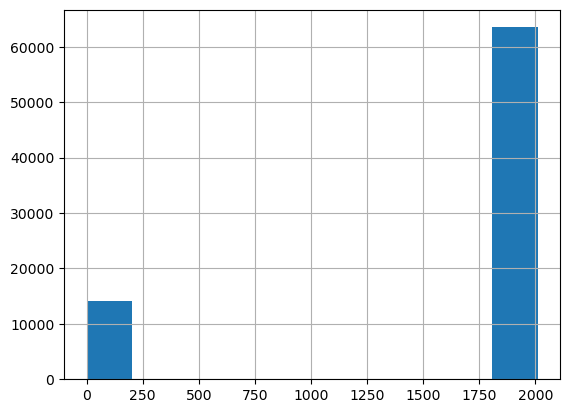

In [16]:
df["year_x"].hist()

In [17]:
df["year_x"].value_counts()/df["year_x"].count()*100

year_x
0       18.221032
2007     7.105056
2006     6.377554
2005     6.175399
2008     5.409268
2004     5.101528
2003     4.858169
2002     4.397203
2009     4.301920
2001     3.562829
2000     3.304019
1999     2.849491
1998     2.580379
1997     2.433591
1996     2.159329
1994     1.963612
1995     1.908245
1993     1.704802
1992     1.434402
1991     1.367447
1989     1.228384
1990     1.088034
1987     0.838237
1988     0.804759
1986     0.755830
2010     0.754542
1985     0.741666
1984     0.643807
1982     0.582002
1983     0.538223
1981     0.468692
1980     0.430063
1979     0.384997
1971     0.364395
1978     0.351519
1977     0.346368
1974     0.324479
1973     0.301302
1970     0.297439
1976     0.256235
1975     0.243359
1972     0.242072
1969     0.235633
1968     0.180266
1967     0.131337
1966     0.075969
1964     0.059230
1965     0.042491
1963     0.014164
1960     0.010301
1961     0.010301
1962     0.010301
1957     0.009013
1958     0.006438
1956     0.005150
195

In [ ]:
# df.to_parquet("../data/processed/merged_data.parquet")